In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [2]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) # load the data

In [3]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


In [55]:
# Mean Face
X = data.drop('gender',axis=1).values # all images
X

array([0.78431373, 0.74117647, 0.7372549 , ..., 0.45882353, 0.4627451 ,
       0.47843137])

In [65]:
a = np.array([[1,2,3],
            [4,5,6]])
print(a[0].mean(axis=0))
print(a.mean(axis=0))

2.0
[2.5 3.5 4.5]


In [47]:
X[0].mean(axis=0)

0.571476862745098

In [67]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face

array([0.37296306, 0.3700094 , 0.36620223, ..., 0.37953866, 0.37908648,
       0.38091788])

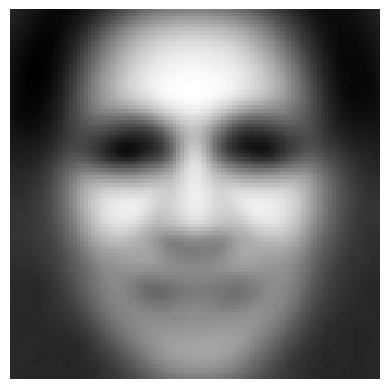

In [7]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [8]:
X_t = X - mean_face # transformed data

In [9]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [68]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df


,explained_var,cum_explained_var,principal_components
0,2.516184e-01,0.251618,1
1,1.143028e-01,0.365921,2
2,1.060027e-01,0.471924,3
3,5.158847e-02,0.523512,4
4,3.317651e-02,0.556689,5
...,...,...,...
4314,1.022966e-36,1.000000,4315
4315,7.175267e-37,1.000000,4316
4316,6.927735e-37,1.000000,4317
4317,6.870675e-37,1.000000,4318


In [11]:
exp_var_df.set_index('principal_components',inplace=True)

In [69]:
exp_var_df

,explained_var,cum_explained_var,principal_components
0,2.516184e-01,0.251618,1
1,1.143028e-01,0.365921,2
2,1.060027e-01,0.471924,3
3,5.158847e-02,0.523512,4
4,3.317651e-02,0.556689,5
...,...,...,...
4314,1.022966e-36,1.000000,4315
4315,7.175267e-37,1.000000,4316
4316,6.927735e-37,1.000000,4317
4317,6.870675e-37,1.000000,4318


<Axes: xlabel='principal_components'>

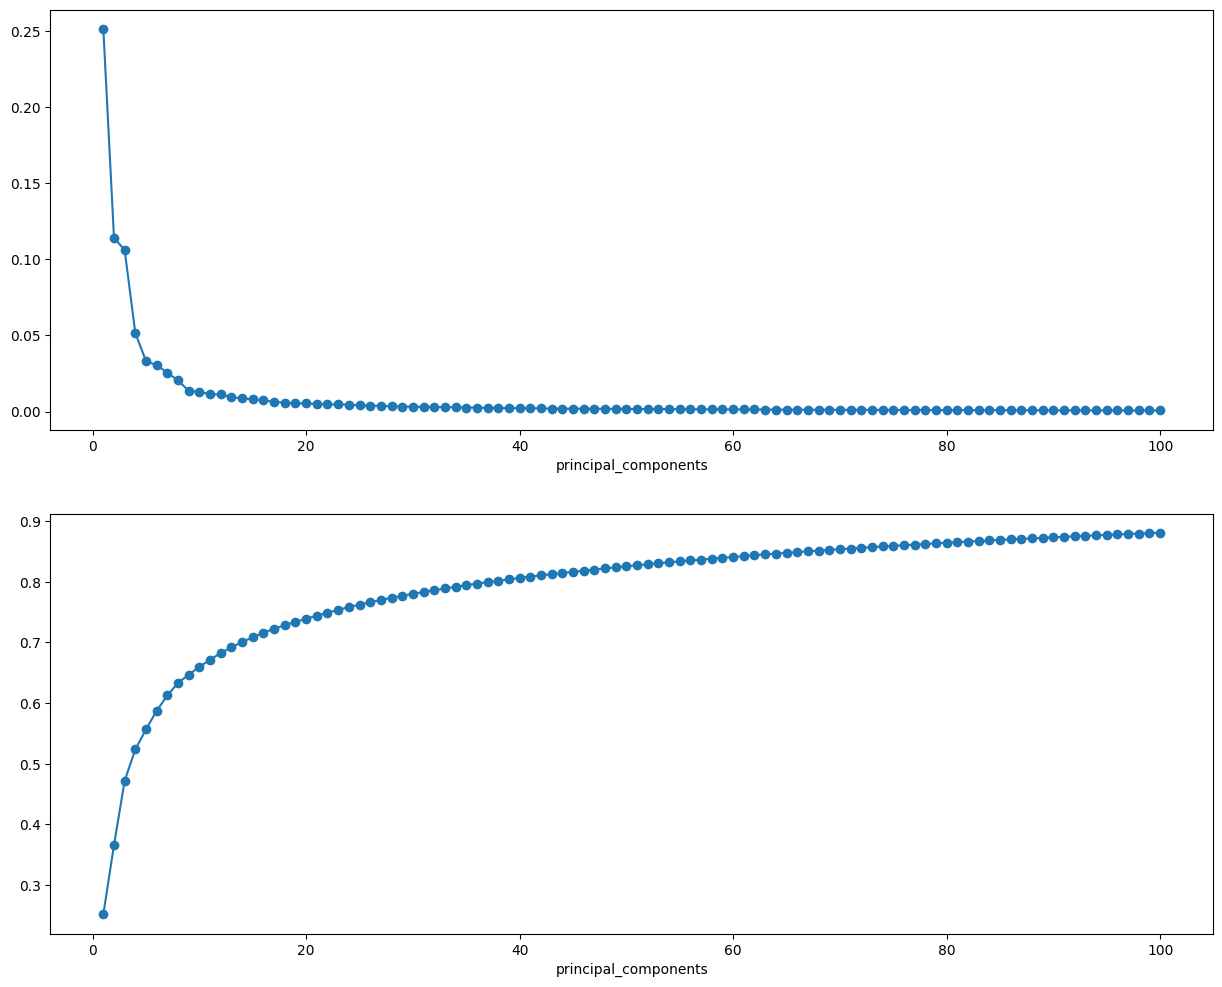

In [12]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [13]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [71]:
pca_data.shape
pca_data.save('pca_dict.h5')

AttributeError: 'dict' object has no attribute 'save'

In [15]:
# saving data and models
y = data['gender'].values # independent variables
np.savez('./data/data_pca_50_target',pca_data,y)

In [16]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [17]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

In [70]:
pca_dict.save('pca_dict.h5')

AttributeError: 'dict' object has no attribute 'save'

In [18]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [19]:
pca_data_inv.shape

(4319, 10000)

In [20]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

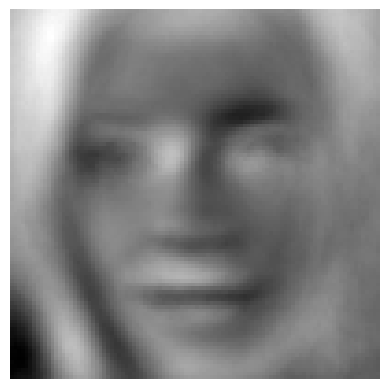

In [21]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

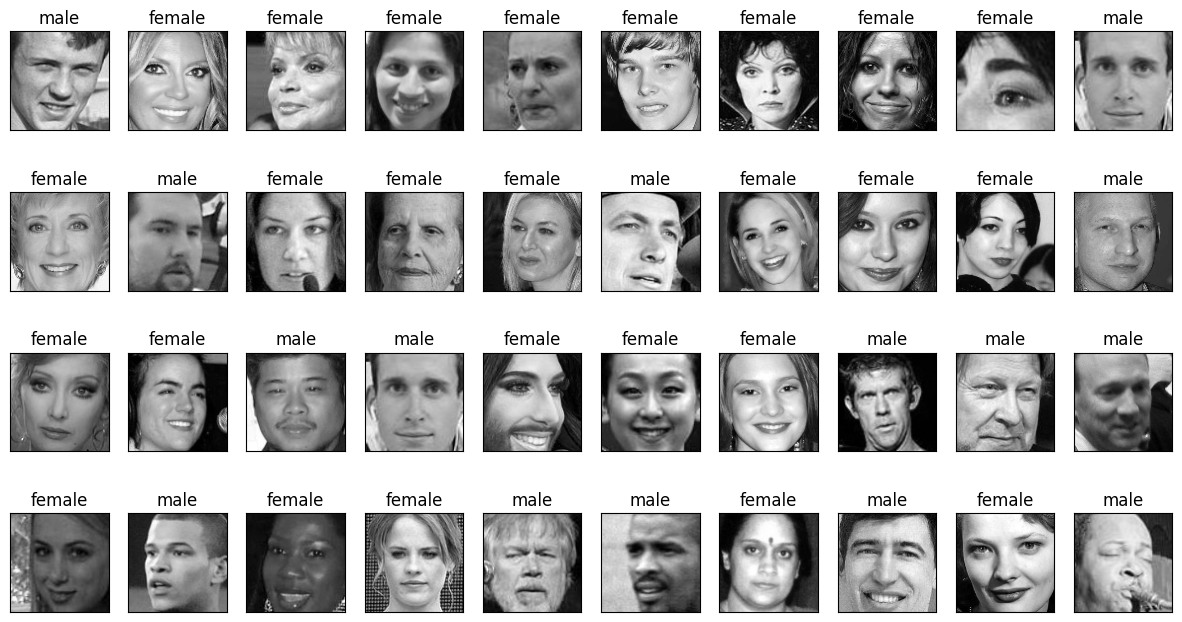

====================Eigen Images====================


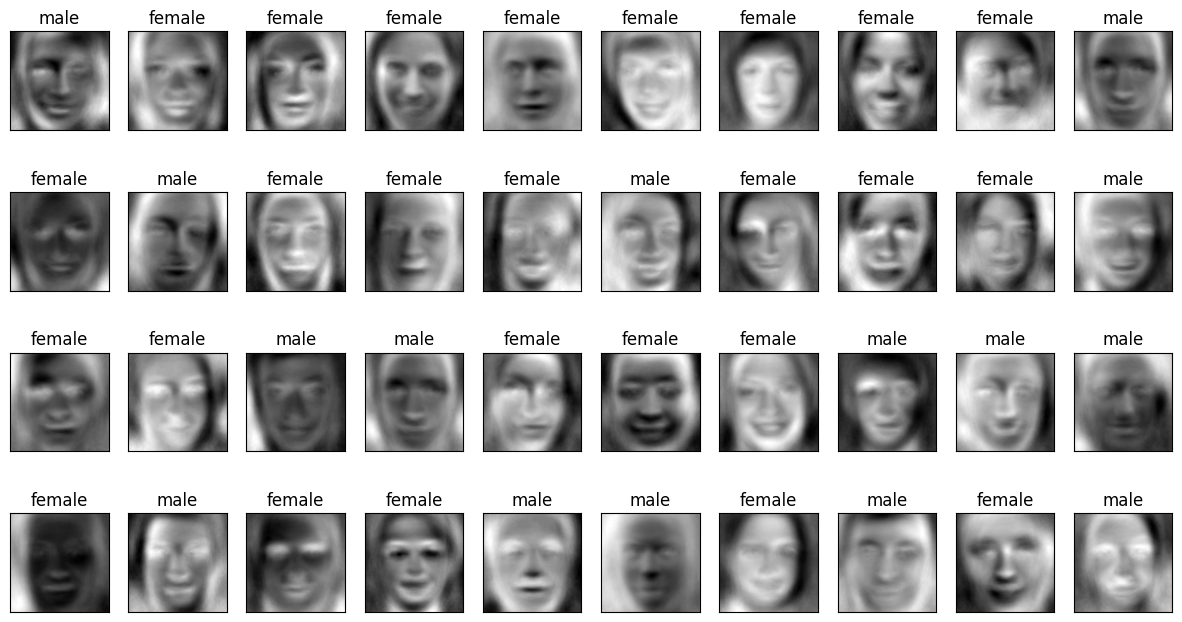

In [22]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()